In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

In [41]:
Image

<module 'PIL.Image' from 'C:\\Users\\T-SERVER\\anaconda3\\envs\\another_env\\Lib\\site-packages\\PIL\\Image.py'>

In [4]:
# !pip install keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
import itertools
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNet

In [8]:
# 18-may-2024

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [9]:
#1. Function to plot model's validation loss and validation accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
# Get the absolute path to the current working directory
# current_directory = os.path.abspath('')

# Create a path to the 'input' directory in the current working directory
# base_skin_dir = os.path.join(current_directory, 'input')

# Merging images from both folders HAM10000_images_part1.zip and HAM10000_images_part2.zip into one dictionary

# imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
#                      for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

# This dictionary is useful for displaying more human-friendly labels later on

# lesion_type_dict = {
#     'nv': 'Melanocytic nevi',
#     'mel': 'Melanoma',
#     'bkl': 'Benign keratosis-like lesions ',
#     'bcc': 'Basal cell carcinoma',
#     'akiec': 'Actinic keratoses',
#     'vasc': 'Vascular lesions',
#     'df': 'Dermatofibroma'
# }

In [10]:
base_skin_dir = os.path.join('.', 'input')
print(base_skin_dir)
# Merging images from both folders HAM10000_images_part1.zip and HAM10000_images_part2.zip into one dictionary

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

# This dictionary is useful for displaying more human-friendly labels later on

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

.\input


In [11]:
# Filter and get the entries starting with "GOG__mel_00001" onwards
start_key = "GOG__mel_00001"
sorted_keys = sorted(imageid_path_dict.keys())
filtered_keys = [key for key in sorted_keys if key >= start_key]

# Get the last 70 entries from the filtered list


# Print the image paths for these keys
for key in filtered_keys:
    print(key, imageid_path_dict[key])

GOG__mel_00001 .\input\HAM10000_images_part_1\GOG__mel_00001.jpg
GOG__mel_00002 .\input\HAM10000_images_part_1\GOG__mel_00002.jpg
GOG__mel_00003 .\input\HAM10000_images_part_1\GOG__mel_00003.jpg
GOG__mel_00009 .\input\HAM10000_images_part_1\GOG__mel_00009.jpg
GOG__mel_00010 .\input\HAM10000_images_part_1\GOG__mel_00010.jpg
GOG_akiec_00001 .\input\HAM10000_images_part_1\GOG_akiec_00001.jpg
GOG_akiec_00002 .\input\HAM10000_images_part_1\GOG_akiec_00002.jpg
GOG_akiec_00003 .\input\HAM10000_images_part_1\GOG_akiec_00003.jpg
GOG_akiec_00004 .\input\HAM10000_images_part_1\GOG_akiec_00004.jpg
GOG_akiec_00009 .\input\HAM10000_images_part_1\GOG_akiec_00009.jpg
GOG_akiec_00010 .\input\HAM10000_images_part_1\GOG_akiec_00010.jpg
GOG_akiec_00011 .\input\HAM10000_images_part_1\GOG_akiec_00011.jpg
GOG_df_00001 .\input\HAM10000_images_part_1\GOG_df_00001.jpg
GOG_df_00002 .\input\HAM10000_images_part_1\GOG_df_00002.jpg
GOG_df_00003 .\input\HAM10000_images_part_1\GOG_df_00003.jpg
GOG_df_00004 .\input\HA

In [12]:
imageid_path_dict

{'GOG_akiec_00001': '.\\input\\HAM10000_images_part_1\\GOG_akiec_00001.jpg',
 'GOG_akiec_00002': '.\\input\\HAM10000_images_part_1\\GOG_akiec_00002.jpg',
 'GOG_akiec_00003': '.\\input\\HAM10000_images_part_1\\GOG_akiec_00003.jpg',
 'GOG_akiec_00004': '.\\input\\HAM10000_images_part_1\\GOG_akiec_00004.jpg',
 'GOG_akiec_00009': '.\\input\\HAM10000_images_part_1\\GOG_akiec_00009.jpg',
 'GOG_akiec_00010': '.\\input\\HAM10000_images_part_1\\GOG_akiec_00010.jpg',
 'GOG_akiec_00011': '.\\input\\HAM10000_images_part_1\\GOG_akiec_00011.jpg',
 'GOG_df_00001': '.\\input\\HAM10000_images_part_1\\GOG_df_00001.jpg',
 'GOG_df_00002': '.\\input\\HAM10000_images_part_1\\GOG_df_00002.jpg',
 'GOG_df_00003': '.\\input\\HAM10000_images_part_1\\GOG_df_00003.jpg',
 'GOG_df_00004': '.\\input\\HAM10000_images_part_1\\GOG_df_00004.jpg',
 'GOG_vasc_00001': '.\\input\\HAM10000_images_part_1\\GOG_vasc_00001.jpg',
 'GOG_vasc_00002': '.\\input\\HAM10000_images_part_1\\GOG_vasc_00002.jpg',
 'GOG_vasc_00003': '.\\inpu

In [13]:
skin_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))

# Creating New Columns for better readability

skin_df['path'] = skin_df['image_id'].map(imageid_path_dict.get)
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get) 
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [14]:
skin_df[:5]

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,.\input\HAM10000_images_part_1\ISIC_0027419.jpg,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,.\input\HAM10000_images_part_1\ISIC_0025030.jpg,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,.\input\HAM10000_images_part_1\ISIC_0026769.jpg,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,.\input\HAM10000_images_part_1\ISIC_0025661.jpg,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,.\input\HAM10000_images_part_2\ISIC_0031633.jpg,Benign keratosis-like lesions,2


In [15]:
skin_df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path             20
cell_type         0
cell_type_idx     0
dtype: int64

In [16]:
skin_df['age'].fillna((skin_df['age'].mean()), inplace=True)

In [17]:
skin_df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age               0
sex               0
localization      0
path             20
cell_type         0
cell_type_idx     0
dtype: int64

In [18]:
print(skin_df.dtypes)

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
path              object
cell_type         object
cell_type_idx       int8
dtype: object


<Axes: >

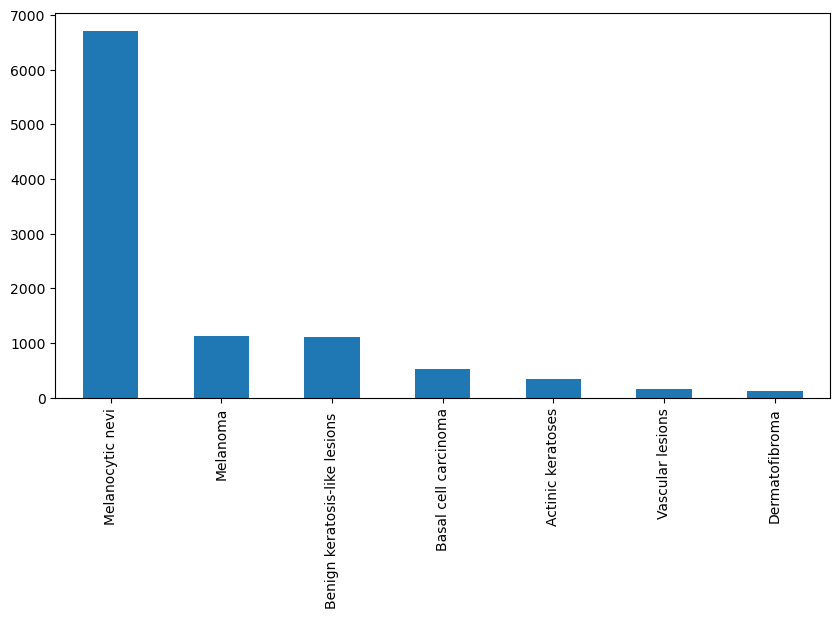

In [19]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
skin_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

<Axes: >

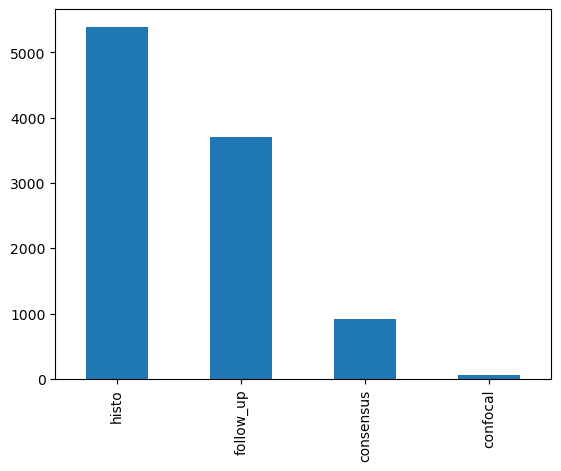

In [20]:
skin_df['dx_type'].value_counts().plot(kind='bar')

<Axes: >

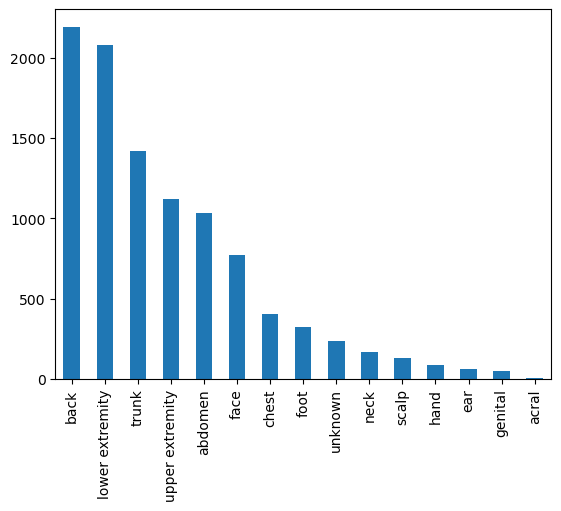

In [21]:
skin_df['localization'].value_counts().plot(kind='bar')


<Axes: >

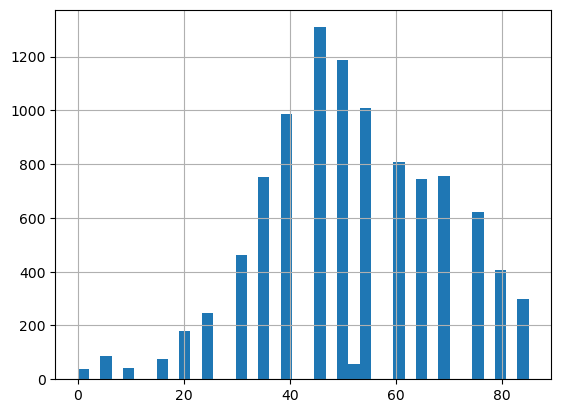

In [22]:
skin_df['age'].hist(bins=40)


<Axes: >

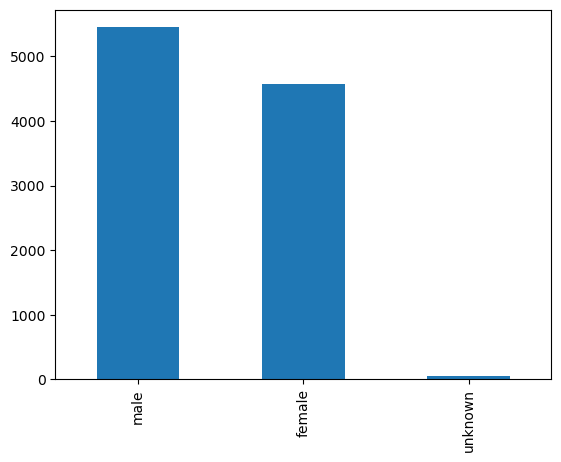

In [23]:
skin_df['sex'].value_counts().plot(kind='bar')

In [ ]:
# sns.scatterplot('age','cell_type_idx',data=skin_df)


In [24]:
# skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))
def process_image(path):
    try:
        if path and isinstance(path, str):
            # Open the image, resize it, and convert to numpy array
            return np.asarray(Image.open(path).resize((100, 75)))
        else:
            return None  # or np.zeros((75, 100, 3)) if you want a default image
    except Exception as e:
        print(f"Error processing image at path {path}: {e}")
        return None

# Apply the process_image function to the 'path' column
skin_df['image'] = skin_df['path'].map(process_image)

In [25]:
skin_df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,.\input\HAM10000_images_part_1\ISIC_0027419.jpg,Benign keratosis-like lesions,2,"[[[190, 153, 194], [192, 154, 196], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,.\input\HAM10000_images_part_1\ISIC_0025030.jpg,Benign keratosis-like lesions,2,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,.\input\HAM10000_images_part_1\ISIC_0026769.jpg,Benign keratosis-like lesions,2,"[[[185, 127, 137], [189, 133, 147], [194, 136,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,.\input\HAM10000_images_part_1\ISIC_0025661.jpg,Benign keratosis-like lesions,2,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,.\input\HAM10000_images_part_2\ISIC_0031633.jpg,Benign keratosis-like lesions,2,"[[[134, 90, 113], [147, 102, 125], [159, 115, ..."


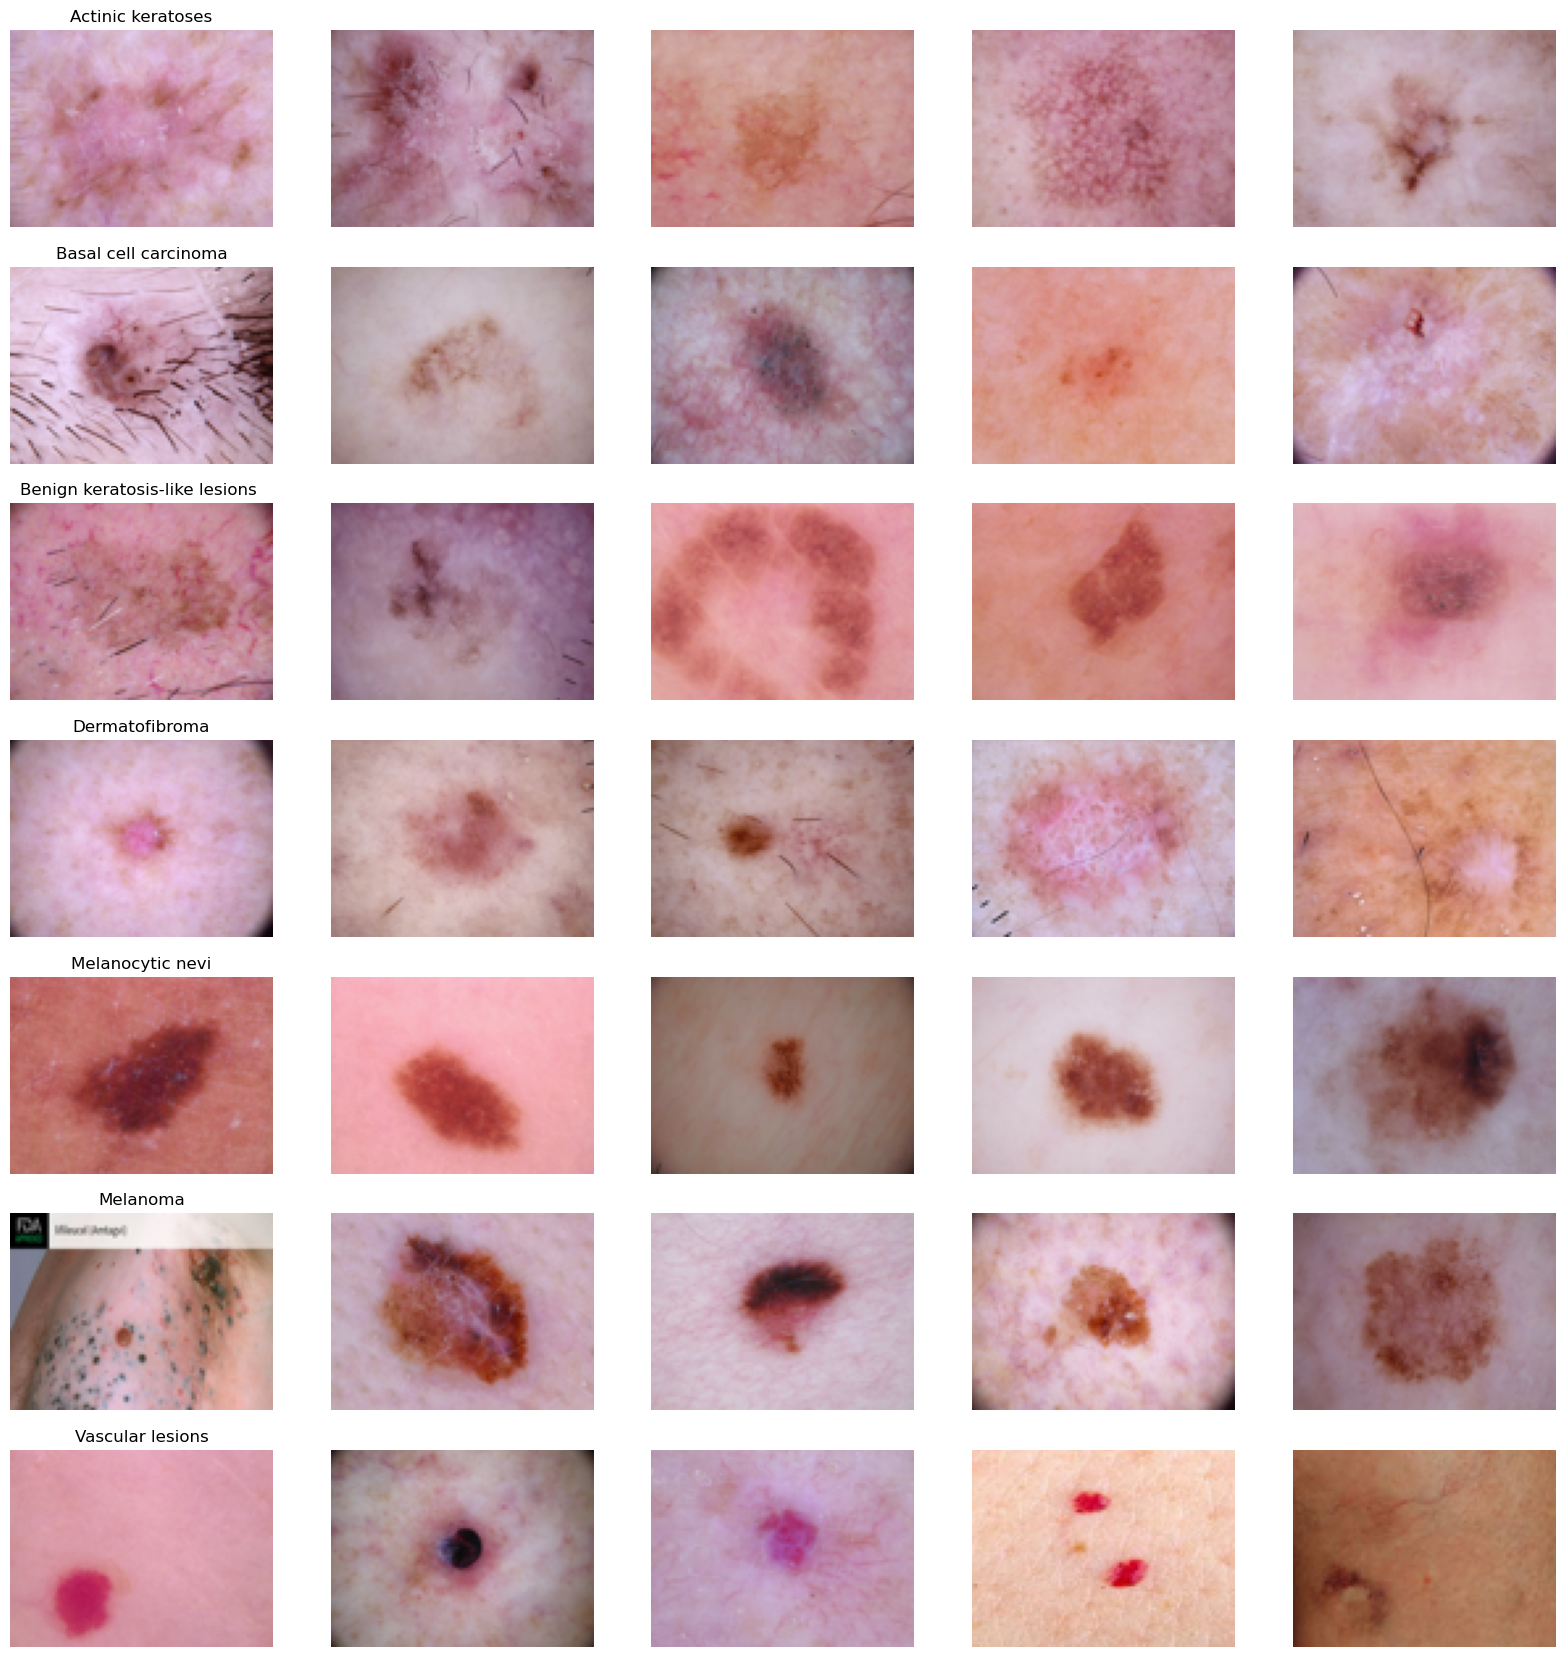

In [86]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [26]:
# skin_df['image'].map(lambda x: x.shape).value_counts()
# Filter out None values
valid_images = skin_df['image'].dropna()

# Apply the shape function to the valid images
shapes = valid_images.map(lambda x: x.shape)

# Count the occurrences of each shape
shape_counts = shapes.value_counts()

print(shape_counts)

(75, 100, 3)    10054
Name: image, dtype: int64


In [27]:
features=skin_df.drop(columns=['cell_type_idx'],axis=1)
target=skin_df['cell_type_idx']

In [28]:
print(skin_df.columns)

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'path', 'cell_type', 'cell_type_idx', 'image'],
      dtype='object')


In [29]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=1234)

In [2]:
# checking
def process_image(path):
    try:
        if path and isinstance(path, str):
            return np.asarray(Image.open(path).resize((100, 75)))
        else:
            return None
    except Exception as e:
        print(f"Error processing image at path {path}: {e}")
        return None

# Apply the process_image function to the 'path' column
skin_df['image'] = skin_df['path'].map(process_image)

# Drop rows where images are None
skin_df = skin_df.dropna(subset=['image'])

# Split the data into training and testing sets
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20, random_state=1234)

# Convert lists of images to NumPy arrays
x_train_list = x_train_o['image'].tolist()
x_test_list = x_test_o['image'].tolist()

# Function to check for any inconsistent image shapes
# def check_image_shapes(images):
#     shapes = [img.shape for img in images]
#     unique_shapes = set(shapes)
#     if len(unique_shapes) > 1:
#         print("Inconsistent image shapes found:", unique_shapes)
#         return False
#     return True

# Check image shapes
# if not check_image_shapes(x_train_list) or not check_image_shapes(x_test_list):
#     raise ValueError("Inconsistent image shapes found. Ensure all images are resized to the same dimensions.")

# Convert to NumPy arrays
x_train = np.asarray(x_train_list)
x_test = np.asarray(x_test_list)

# Normalize the data
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean) / x_train_std
x_test = (x_test - x_test_mean) / x_test_std

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

NameError: name 'skin_df' is not defined

In [31]:
# Check for any inconsistent image shapes
# def check_image_shapes(images):
#     shapes = [img.shape for img in images]
#     unique_shapes = set(shapes)
#     if len(unique_shapes) > 1:
#         print("Inconsistent image shapes found:", unique_shapes)
#         return False
#     return True

# # Convert lists of images to NumPy arrays
x_train_list = x_train_o['image'].tolist()
x_test_list = x_test_o['image'].tolist()

# # Check image shapes
# if not check_image_shapes(x_train_list) or not check_image_shapes(x_test_list):
#     raise ValueError("Inconsistent image shapes found. Ensure all images are resized to the same dimensions.")

# x_train = np.asarray(x_train_list)
# x_test = np.asarray(x_test_list)

# Normalize the data
# x_train_mean = np.mean(x_train)
# x_train_std = np.std(x_train)

# x_test_mean = np.mean(x_test)
# x_test_std = np.std(x_test)

# x_train = (x_train - x_train_mean) / x_train_std
# x_test = (x_test - x_test_mean) / x_test_std

# print(f"x_train shape: {x_train.shape}")
# print(f"x_test shape: {x_test.shape}")
# x_train = np.asarray(x_train_o['image'].tolist())
# x_test = np.asarray(x_test_o['image'].tolist())

# x_train_mean = np.mean(x_train)
# x_train_std = np.std(x_train)

# x_test_mean = np.mean(x_test)
# x_test_std = np.std(x_test)

# x_train = (x_train - x_train_mean)/x_train_std
# x_test = (x_test - x_test_mean)/x_test_std

In [32]:
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

In [33]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)


NameError: name 'x_train' is not defined

In [34]:
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))

NameError: name 'x_train' is not defined

In [ ]:
input_shape = (75, 100, 3)
num_classes = 7

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.25),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.40),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Define the optimizer
# optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile the model
cnn.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
# testing with mobilene, current:
input_shape = (75, 100, 3)
num_classes = 7

# Load the MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model
base_model.trainable = False

# Define the model
enhanced_cnn = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
enhanced_cnn.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Data augmentation
augmentation_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit augmentation generator to the training data
augmentation_generator.fit(x_train)

# Callbacks
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
early_stopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
enhanced_cnn.fit(augmentation_generator.flow(x_train, y_train, batch_size=32),
                 validation_data=(x_validate, y_validate),
                 epochs=50,
                 callbacks=[lr_reduction, early_stopper])

# Evaluate the model
test_loss, test_accuracy = enhanced_cnn.evaluate(x_test, y_test, verbose=1)
validation_loss, validation_accuracy = enhanced_cnn.evaluate(x_validate, y_validate, verbose=1)

print("Validation: accuracy = %f  ;  loss = %f" % (validation_accuracy, validation_loss))
print("Test: accuracy = %f  ;  loss = %f" % (test_accuracy, test_loss))




In [5]:
# resNEt model testing
from tensorflow.keras.applications import ResNet50

# Define input shape and number of classes
input_shape = (75, 100, 3)
num_classes = 7

# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Fine-tune some layers - example fine-tuning last two convolutional blocks
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Build the model
enhanced_cnn = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
enhanced_cnn.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Data augmentation
augmentation_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit augmentation generator to the training data
augmentation_generator.fit(x_train)

# Callbacks
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
early_stopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
enhanced_cnn.fit(augmentation_generator.flow(x_train, y_train, batch_size=32),
                 validation_data=(x_validate, y_validate),
                 epochs=50,
                 callbacks=[lr_reduction, early_stopper])

# Evaluate the model
test_loss, test_accuracy = enhanced_cnn.evaluate(x_test, y_test, verbose=1)
validation_loss, validation_accuracy = enhanced_cnn.evaluate(x_validate, y_validate, verbose=1)

print("Validation: accuracy = %f  ;  loss = %f" % (validation_accuracy, validation_loss))
print("Test: accuracy = %f  ;  loss = %f" % (test_accuracy, test_loss))



NameError: name 'regularizers' is not defined

In [ ]:
####testing to convert without tensorflow decision forest
# Set environment variable to disable floating-point round-off errors
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# input_shape = (75, 100, 3)
# num_classes = 7

# # Define the model
# enhanced_cnn = models.Sequential([
#     layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
#     layers.BatchNormalization(),
#     layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.25),

#     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
#     layers.BatchNormalization(),
#     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.40),

#     layers.Flatten(),
#     layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#     layers.BatchNormalization(),
#     layers.Dropout(0.5),
#     layers.Dense(num_classes, activation='softmax')
# ])

# # Compile the model
# enhanced_cnn.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# # Data augmentation
# augmentation_generator = ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# # Fit augmentation generator to the training data
# augmentation_generator.fit(x_train)

# # Callbacks
# lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
# early_stopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model
# enhanced_cnn.fit(augmentation_generator.flow(x_train, y_train, batch_size=32),
#                  validation_data=(x_validate, y_validate),
#                  epochs=10,
#                  callbacks=[lr_reduction, early_stopper])

# # Evaluate the model
# test_loss, test_accuracy = enhanced_cnn.evaluate(x_test, y_test, verbose=1)
# validation_loss, validation_accuracy = enhanced_cnn.evaluate(x_validate, y_validate, verbose=1)

# print("Validation: accuracy = %f  ;  loss = %f" % (validation_accuracy, validation_loss))
# print("Test: accuracy = %f  ;  loss = %f" % (test_accuracy, test_loss))

In [107]:
enhanced_cnn.save('rsmodel.h5')


In [ ]:
enhanced_cnn.save('mobile.h5')


In [36]:
loaded_model = tf.keras.models.load_model('rsmodel.h5')

# Verify the model by evaluating or predicting
aloss, acc = loaded_model.evaluate(x_train, y_train, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc, aloss))

# Data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False  # randomly flip images
)

# Fit augmentation generator to the training data
datagen.fit(x_train)

# Check input shapes
print("Input shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

# Check for NaN or Infinity
print("NaN or Infinity check:")
print("x_train:", np.any(np.isnan(x_train)), np.any(np.isinf(x_train)))
print("y_train:", np.any(np.isnan(y_train)), np.any(np.isinf(y_train)))

# Train the model
history = loaded_model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=50)

# Evaluate the model
loss, accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = loaded_model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

# Save the model
loaded_model.save("rsmodel.h5")

NameError: name 'x_train' is not defined

In [ ]:
enhanced_cnn.save("testing_model.h5")

In [ ]:
enhanced_cnn.save("enhanced_model.h5")

In [ ]:
loaded_model = tf.keras.models.load_model('model.h5')

# Verify the model by evaluating or predicting
aloss, acc = loaded_model.evaluate(x_train, y_train, verbose=1)

print("Test: accuracy = %f  ;  loss = %f" % (acc, aloss))

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
print("Input shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

# Check for NaN or Infinity
print("NaN or Infinity check:")
print("x_train:", np.any(np.isnan(x_train)), np.any(np.isinf(x_train)))
print("y_train:", np.any(np.isnan(y_train)), np.any(np.isinf(y_train)))

In [ ]:
history = cnn.fit(x_train, y_train, epochs=10)

In [ ]:
loss, accuracy = cnn.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = cnn.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

In [ ]:
cnn.save("model.h5");
print(history.history)
# plot_model_history(history)

In [ ]:
loaded_model = tf.keras.models.load_model('model.h5')

# Verify the model by evaluating or predicting
aloss, acc = loaded_model.evaluate(x_train, y_train, verbose=1)

print("Test: accuracy = %f  ;  loss = %f" % (acc, aloss))

In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# Function to plot confusion matrix    
def plot_confusion_matrix(cm, lesion_type_dict,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(lesion_type_dict))
    plt.xticks(tick_marks, lesion_type_dict, rotation=45)
    plt.yticks(tick_marks, lesion_type_dict)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = cnn.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, lesion_type_dict) 

In [ ]:
def plot_confusion_matrix(cm, classes, class_labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Your class labels
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# Example usage:
# ... (your code for predictions and confusion matrix calculation)

# Plot the confusion matrix with class labels
plot_confusion_matrix(confusion_mtx, classes=range(7), class_labels=lesion_type_dict.keys())
plt.show()

In [ ]:
confusion_mtx

In [ ]:
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, lesion_type_dict,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(lesion_type_dict))
    plt.xticks(tick_marks, lesion_type_dict.values(), rotation=45)
    plt.yticks(tick_marks, lesion_type_dict.values())

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = cnn.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, lesion_type_dict) 


In [ ]:
def plot_confusion_matrix(cm, lesion_type_dict,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    labels = list(lesion_type_dict.values())  # Convert dictionary values to a list
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)  # Use the list of labels here
    plt.yticks(tick_marks, labels)  # And here

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = cnn.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, lesion_type_dict)     
